### Import dependencies :

In [1]:
import pandas as pd 
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error

### Load Data :

In [2]:
val_results=pd.read_csv('modeling_results.csv')
val_results.head(9)

,Model,Best Score
0,Random Forest,0.001904
1,Extra Trees,0.001362
2,Gradient Boosting,0.000973
3,AdaBoost,0.023561
4,XGBoost,0.000692
5,LightGBM,0.000815
6,CatBoost,0.000721
7,K-Nearest Neighbors,0.005107
8,Support Vector Regression,0.002476


In [3]:
test_results=pd.read_csv('metrics_results.csv')
test_results.head(9)

,Model,MSE,MAE
0,Random Forest,0.001773,0.026955
1,Extra Trees,0.001257,0.021575
2,Gradient Boosting,0.000953,0.022013
3,AdaBoost,0.024411,0.124682
4,XGBoost,0.000643,0.017330
5,LightGBM,0.000808,0.019945
6,CatBoost,0.000717,0.018692
7,K-Nearest Neighbors,0.004879,0.047831
8,Support Vector Regression,0.002428,0.039932


In [4]:
df=pd.read_csv('preprocessed_data.csv')
X=df.drop(columns=['alpha_exp'])
y=df['alpha_exp']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


### Load Best Model :

In [5]:
model=joblib.load('model.pkl')

In [6]:
print(model.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [7]:
y_pred=model.predict(X_test)

In [8]:
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
print(f'MAE :{MAE}')
print(f'MSE :{MSE}')

MAE :0.017329701007596354
MSE :0.0006432095338150486


In [9]:
df=pd.read_csv('preprocessed_data.csv')
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mprime_a_bin_1,mprime_a_bin_2,mprime_a_bin_3,mprime_a_bin_4,mprime_g_bin_0,mprime_g_bin_1,mprime_g_bin_2,mprime_g_bin_3,mprime_g_bin_4,alpha_exp
0,0.938938,0.830099,0.173544,0.205274,-0.748201,-0.102195,-0.148214,1.494961,-0.196407,-0.449844,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.142834
1,0.072507,-1.551574,1.219797,0.880461,-0.191308,-0.932700,-0.652588,1.032032,1.082365,-0.470705,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.438038
2,-2.603383,0.858439,0.110632,0.141423,2.954771,-0.107965,-0.172161,-1.032376,-0.241683,0.598065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.323184
3,0.181490,0.807331,0.890559,-1.173034,-0.267672,-1.155707,-0.908316,0.025438,-1.062994,0.958397,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.133261
4,-0.956225,0.171426,-0.105690,0.448112,0.653581,0.622586,0.469534,-0.757894,-0.363971,0.962627,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.378004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,-0.142545,-0.840552,1.181431,1.179116,-0.034307,-0.646551,-0.355299,-0.818006,-0.979054,0.834325,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.439705
362499,-0.217888,-0.025624,0.314853,0.728064,0.022821,0.496683,0.508949,0.483711,-0.757920,-1.677835,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.758558
362500,-1.260520,-0.089295,0.227395,0.765189,0.960787,0.743714,0.732254,-1.475407,-0.782331,-1.559563,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.806486
362501,-0.789749,0.950134,1.143700,0.483449,0.498611,-0.969059,-0.716191,-1.421001,0.517531,1.153519,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.911098


In [10]:
exp=df['alpha_exp']
exp

0         1.142834
1         1.438038
2         1.323184
3         1.133261
4         1.378004
            ...   
362498    1.439705
362499    1.758558
362500    1.806486
362501    0.911098
362502    1.590015
Name: alpha_exp, Length: 362503, dtype: float64

In [11]:
cols_to_scale_inv = df.drop(columns=['mprime_a_bin_0', 'mprime_a_bin_1',
       'mprime_a_bin_2', 'mprime_a_bin_3', 'mprime_a_bin_4', 'mprime_g_bin_0',
       'mprime_g_bin_1', 'mprime_g_bin_2', 'mprime_g_bin_3', 'mprime_g_bin_4','alpha_exp'
       ]).columns
cols_to_encode_inv = ['mprime_a_bin_0', 'mprime_a_bin_1',
       'mprime_a_bin_2', 'mprime_a_bin_3', 'mprime_a_bin_4', 'mprime_g_bin_0',
       'mprime_g_bin_1', 'mprime_g_bin_2', 'mprime_g_bin_3', 'mprime_g_bin_4',
       ]

In [12]:
scaler=joblib.load('scaler.pkl')
encoder=joblib.load('/home/fayari/Stage/modeling/encoder copy.pkl')
X_scaled_part = df[cols_to_scale_inv].values
X_encoded_part = df[cols_to_encode_inv].values
# 2. Inverser la standardisation
X_original_scaled = scaler.inverse_transform(X_scaled_part)

# 3. Inverser l'encodage
X_original_categoricals = encoder.inverse_transform(X_encoded_part)

In [13]:
df_reconstructed = pd.DataFrame(
    X_original_scaled,
    columns=['Tg_scat', 'Tg_abs', 'Ta_abs', 'SSA', 'GOD', 'AOD', 'AODS', 'SZA', 'Z',
       'R_scence', 'g1', 'Cos(SZA)', 'mu_g', 'mu_a', 'muprime_g', 'muprime_a',
       'mprime_g', 'mprime_a'],
    index=df.index
)
df_categoricals = pd.DataFrame(
    X_original_categoricals,
    columns=['mprime_a_bin', 'mprime_g_bin'],
    index=df.index
)
df = pd.concat([df_reconstructed, df_categoricals], axis=1)

In [14]:
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,mprime_a_bin,mprime_g_bin
0,0.984234,0.967931,0.760961,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,0.946187,0.150275,708.015229,3186.068532,0.154730,0.151289,5.695816,3.743539,0,0
1,0.808703,0.502863,0.962999,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,0.910936,0.347431,708.188358,3186.847609,0.349206,0.347828,2.122562,0.747097,0,0
2,0.266592,0.973465,0.748812,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,0.896924,0.953452,708.009100,3186.040949,0.953519,0.953467,0.929959,0.610609,0,0
3,0.830782,0.963485,0.899421,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,0.869940,0.716221,707.897906,3185.540575,0.716701,0.716328,1.382759,1.340499,0,0
4,0.600291,0.839312,0.707039,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,0.878946,0.910105,707.992544,3185.966446,0.910238,0.910135,0.990440,0.689159,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,0.765135,0.641704,0.955590,0.825442,0.267702,0.214810,0.177313,22.962506,183.428535,0.740243,0.668902,0.920760,707.909270,3185.591714,0.920877,0.920786,1.064013,0.990855,0,0
362499,0.749872,0.800834,0.788248,0.719020,0.287853,0.608888,0.437803,55.826486,452.874619,0.016449,0.818049,0.561701,707.939208,3185.726437,0.562559,0.561892,1.690357,1.419079,0,0
362500,0.538644,0.788402,0.771359,0.727779,0.618701,0.694040,0.505108,6.365350,423.130196,0.050525,0.896188,0.993835,707.935903,3185.711565,0.993844,0.993837,0.959983,0.814335,0,0
362501,0.634018,0.991370,0.948304,0.661306,0.455678,0.103640,0.068538,7.738936,2006.981168,0.832208,0.860886,0.990892,708.111887,3186.503491,0.990905,0.990895,0.807461,0.369966,0,0


In [15]:
results=pd.read_csv('/home/fayari/Stage/data_exploration/no_outliers.csv')

In [16]:
results.head()

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.984234,0.967931,0.760961,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,0.946187,0.150275,708.015229,3186.068532,0.154730,0.151289,5.695816,3.743539,429.332315,0.133511
1,0.808703,0.502863,0.962999,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,0.910936,0.347431,708.188358,3186.847609,0.349206,0.347828,2.122562,0.747097,194.210750,0.363279
2,0.266592,0.973465,0.748812,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,0.896924,0.953452,708.009100,3186.040949,0.953519,0.953467,0.929959,0.610609,648.404343,0.280041
3,0.830782,0.963485,0.899421,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,0.869940,0.716221,707.897906,3185.540575,0.716701,0.716328,1.382759,1.340499,885.138727,0.125099
4,0.600291,0.839312,0.707039,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,0.878946,0.910105,707.992544,3185.966446,0.910238,0.910135,0.990440,0.689159,602.697524,0.320636


In [17]:
df['alpha']=results['alpha']
df['BOA_RT']=results['BOA_RT']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362503 entries, 0 to 362502
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Tg_scat       362503 non-null  float64
 1   Tg_abs        362503 non-null  float64
 2   Ta_abs        362503 non-null  float64
 3   SSA           362503 non-null  float64
 4   GOD           362503 non-null  float64
 5   AOD           362503 non-null  float64
 6   AODS          362503 non-null  float64
 7   SZA           362503 non-null  float64
 8   Z             362503 non-null  float64
 9   R_scence      362503 non-null  float64
 10  g1            362503 non-null  float64
 11  Cos(SZA)      362503 non-null  float64
 12  mu_g          362503 non-null  float64
 13  mu_a          362503 non-null  float64
 14  muprime_g     362503 non-null  float64
 15  muprime_a     362503 non-null  float64
 16  mprime_g      362503 non-null  float64
 17  mprime_a      362503 non-null  float64
 18  mpri

In [19]:
import numpy as np
df['alpha'] == np.log(exp)

0         False
1          True
2         False
3          True
4         False
          ...  
362498    False
362499    False
362500     True
362501    False
362502    False
Length: 362503, dtype: bool

In [20]:
df['alpha']

0         0.133511
1         0.363279
2         0.280041
3         0.125099
4         0.320636
            ...   
362498    0.364438
362499    0.564494
362500    0.591383
362501   -0.093105
362502    0.463743
Name: alpha, Length: 362503, dtype: float64

In [21]:
import numpy as np
X=df.drop(columns=['alpha'])
y=np.exp(df['alpha'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
df.head()

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,mprime_a_bin,mprime_g_bin,alpha,BOA_RT
0,0.984234,0.967931,0.760961,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,...,708.015229,3186.068532,0.154730,0.151289,5.695816,3.743539,0,0,0.133511,429.332315
1,0.808703,0.502863,0.962999,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,...,708.188358,3186.847609,0.349206,0.347828,2.122562,0.747097,0,0,0.363279,194.210750
2,0.266592,0.973465,0.748812,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,...,708.009100,3186.040949,0.953519,0.953467,0.929959,0.610609,0,0,0.280041,648.404343
3,0.830782,0.963485,0.899421,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,...,707.897906,3185.540575,0.716701,0.716328,1.382759,1.340499,0,0,0.125099,885.138727
4,0.600291,0.839312,0.707039,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,...,707.992544,3185.966446,0.910238,0.910135,0.990440,0.689159,0,0,0.320636,602.697524


In [23]:
scaler=joblib.load( "scaler.pkl")
encoder=joblib.load('/home/fayari/Stage/modeling/encoder copy.pkl')
cols_to_scale = df.drop(columns=['alpha','BOA_RT','mprime_a_bin','mprime_g_bin']).columns
cols_to_encode = ['mprime_a_bin', 'mprime_g_bin']
BOA_RT=df['BOA_RT']
X_scaled = scaler.transform(df[cols_to_scale])
X_bins_encoded = encoder.transform(df[cols_to_encode])

# 2. Inverser la standardisation
df_reconstructed = pd.DataFrame(
    X_scaled,
    columns=['Tg_scat', 'Tg_abs', 'Ta_abs', 'SSA', 'GOD', 'AOD', 'AODS', 'SZA', 'Z',
       'R_scence', 'g1', 'Cos(SZA)', 'mu_g', 'mu_a', 'muprime_g', 'muprime_a',
       'mprime_g', 'mprime_a'],
    index=df.index
)
df_categoricals = pd.DataFrame(
    X_bins_encoded,
    columns=['mprime_a_bin_0', 'mprime_a_bin_1',
       'mprime_a_bin_2', 'mprime_a_bin_3', 'mprime_a_bin_4', 'mprime_g_bin_0',
       'mprime_g_bin_1', 'mprime_g_bin_2', 'mprime_g_bin_3', 'mprime_g_bin_4',],
    index=df.index
)
df_prep= pd.concat([df_reconstructed, df_categoricals], axis=1)

In [24]:
df_prep['BOA_RT']=df['BOA_RT']
df_prep['alpha']=df['alpha']
df_prep

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mprime_a_bin_2,mprime_a_bin_3,mprime_a_bin_4,mprime_g_bin_0,mprime_g_bin_1,mprime_g_bin_2,mprime_g_bin_3,mprime_g_bin_4,BOA_RT,alpha
0,0.938938,0.830099,0.173544,0.205274,-0.748201,-0.102195,-0.148214,1.494961,-0.196407,-0.449844,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,429.332315,0.133511
1,0.072507,-1.551574,1.219797,0.880461,-0.191308,-0.932700,-0.652588,1.032032,1.082365,-0.470705,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,194.210750,0.363279
2,-2.603383,0.858439,0.110632,0.141423,2.954771,-0.107965,-0.172161,-1.032376,-0.241683,0.598065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,648.404343,0.280041
3,0.181490,0.807331,0.890559,-1.173034,-0.267672,-1.155707,-0.908316,0.025438,-1.062994,0.958397,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,885.138727,0.125099
4,-0.956225,0.171426,-0.105690,0.448112,0.653581,0.622586,0.469534,-0.757894,-0.363971,0.962627,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,602.697524,0.320636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,-0.142545,-0.840552,1.181431,1.179116,-0.034307,-0.646551,-0.355299,-0.818006,-0.979054,0.834325,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,534.140819,0.364438
362499,-0.217888,-0.025624,0.314853,0.728064,0.022821,0.496683,0.508949,0.483711,-0.757920,-1.677835,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,387.264753,0.564494
362500,-1.260520,-0.089295,0.227395,0.765189,0.960787,0.743714,0.732254,-1.475407,-0.782331,-1.559563,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,476.450471,0.591383
362501,-0.789749,0.950134,1.143700,0.483449,0.498611,-0.969059,-0.716191,-1.421001,0.517531,1.153519,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1015.811664,-0.093105


In [25]:
import numpy as np
X=df_prep.drop(columns=['alpha'])
y=np.exp(df_prep['alpha'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
y_pred=model.predict(X_test.drop(columns=['BOA_RT']))

In [27]:
y_pred

array([0.84231454, 1.4484389 , 1.2809356 , ..., 1.1908828 , 1.1461853 ,
       1.2756097 ], dtype=float32)

In [28]:
y_test

159680    0.799110
347342    1.457438
307069    1.269854
126659    1.601604
356896    1.136834
            ...   
326002    1.214739
190999    0.867253
27703     1.161778
76624     1.154227
189606    1.257444
Name: alpha, Length: 90626, dtype: float64

In [29]:
MAE=mean_absolute_error(np.log(y_pred),np.log(y_test))
MSE=mean_squared_error(np.log(y_pred),np.log(y_test))
print(f'MAE :{MAE}')
print(f'MSE :{MSE}')

MAE :0.013132301968326085
MSE :0.0003864587981890642


In [30]:
X_test

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mprime_a_bin_1,mprime_a_bin_2,mprime_a_bin_3,mprime_a_bin_4,mprime_g_bin_0,mprime_g_bin_1,mprime_g_bin_2,mprime_g_bin_3,mprime_g_bin_4,BOA_RT
159680,0.968688,0.690381,-1.786254,-0.842480,-0.765509,0.221345,-0.349359,-1.019351,2.036857,1.369018,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,914.444755
347342,-1.203300,0.908147,0.445329,-0.205544,0.900421,-0.673723,-0.603632,0.725515,-0.216203,-0.280011,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,594.575497
307069,-0.052629,-0.103307,0.523560,-2.028452,-0.101012,-1.229507,-0.940427,1.285479,-1.116649,0.798446,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,284.591943
126659,0.122052,-1.145261,-1.164093,-0.352838,-0.226280,0.457653,-0.026960,0.770059,2.211000,-0.862565,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,373.718733
356896,-0.314747,0.806773,-1.659987,-1.604842,0.097997,-0.740746,-0.841591,-1.634395,-0.617101,1.323553,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,832.137702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326002,0.570257,0.210242,-0.249959,-0.963130,-0.524454,-0.741572,-0.750298,-1.102005,0.164011,0.682795,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,801.588284
190999,-0.122803,-1.748566,0.709231,1.172320,-0.049088,0.707174,0.919019,1.778795,0.595663,1.627898,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.089238
27703,0.718968,0.367986,0.325614,0.103691,-0.616840,-0.358504,-0.347800,-0.751896,-1.091658,0.908998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,735.627029
76624,0.015910,0.770747,1.374100,-1.292452,-0.150825,-1.263014,-0.941725,-0.509560,-0.099483,0.205600,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,924.379368


In [31]:
df_prep

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mprime_a_bin_2,mprime_a_bin_3,mprime_a_bin_4,mprime_g_bin_0,mprime_g_bin_1,mprime_g_bin_2,mprime_g_bin_3,mprime_g_bin_4,BOA_RT,alpha
0,0.938938,0.830099,0.173544,0.205274,-0.748201,-0.102195,-0.148214,1.494961,-0.196407,-0.449844,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,429.332315,0.133511
1,0.072507,-1.551574,1.219797,0.880461,-0.191308,-0.932700,-0.652588,1.032032,1.082365,-0.470705,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,194.210750,0.363279
2,-2.603383,0.858439,0.110632,0.141423,2.954771,-0.107965,-0.172161,-1.032376,-0.241683,0.598065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,648.404343,0.280041
3,0.181490,0.807331,0.890559,-1.173034,-0.267672,-1.155707,-0.908316,0.025438,-1.062994,0.958397,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,885.138727,0.125099
4,-0.956225,0.171426,-0.105690,0.448112,0.653581,0.622586,0.469534,-0.757894,-0.363971,0.962627,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,602.697524,0.320636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,-0.142545,-0.840552,1.181431,1.179116,-0.034307,-0.646551,-0.355299,-0.818006,-0.979054,0.834325,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,534.140819,0.364438
362499,-0.217888,-0.025624,0.314853,0.728064,0.022821,0.496683,0.508949,0.483711,-0.757920,-1.677835,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,387.264753,0.564494
362500,-1.260520,-0.089295,0.227395,0.765189,0.960787,0.743714,0.732254,-1.475407,-0.782331,-1.559563,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,476.450471,0.591383
362501,-0.789749,0.950134,1.143700,0.483449,0.498611,-0.969059,-0.716191,-1.421001,0.517531,1.153519,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1015.811664,-0.093105


In [32]:
y_pred_all=model.predict(df_prep.drop(columns=['BOA_RT','alpha']))

In [33]:
df_prep

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mprime_a_bin_2,mprime_a_bin_3,mprime_a_bin_4,mprime_g_bin_0,mprime_g_bin_1,mprime_g_bin_2,mprime_g_bin_3,mprime_g_bin_4,BOA_RT,alpha
0,0.938938,0.830099,0.173544,0.205274,-0.748201,-0.102195,-0.148214,1.494961,-0.196407,-0.449844,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,429.332315,0.133511
1,0.072507,-1.551574,1.219797,0.880461,-0.191308,-0.932700,-0.652588,1.032032,1.082365,-0.470705,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,194.210750,0.363279
2,-2.603383,0.858439,0.110632,0.141423,2.954771,-0.107965,-0.172161,-1.032376,-0.241683,0.598065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,648.404343,0.280041
3,0.181490,0.807331,0.890559,-1.173034,-0.267672,-1.155707,-0.908316,0.025438,-1.062994,0.958397,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,885.138727,0.125099
4,-0.956225,0.171426,-0.105690,0.448112,0.653581,0.622586,0.469534,-0.757894,-0.363971,0.962627,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,602.697524,0.320636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,-0.142545,-0.840552,1.181431,1.179116,-0.034307,-0.646551,-0.355299,-0.818006,-0.979054,0.834325,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,534.140819,0.364438
362499,-0.217888,-0.025624,0.314853,0.728064,0.022821,0.496683,0.508949,0.483711,-0.757920,-1.677835,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,387.264753,0.564494
362500,-1.260520,-0.089295,0.227395,0.765189,0.960787,0.743714,0.732254,-1.475407,-0.782331,-1.559563,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,476.450471,0.591383
362501,-0.789749,0.950134,1.143700,0.483449,0.498611,-0.969059,-0.716191,-1.421001,0.517531,1.153519,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1015.811664,-0.093105


In [34]:
df['alpha_pred']=np.log(y_pred_all)
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,mprime_a_bin,mprime_g_bin,alpha,BOA_RT,alpha_pred
0,0.984234,0.967931,0.760961,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,...,3186.068532,0.154730,0.151289,5.695816,3.743539,0,0,0.133511,429.332315,0.181697
1,0.808703,0.502863,0.962999,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,...,3186.847609,0.349206,0.347828,2.122562,0.747097,0,0,0.363279,194.210750,0.361506
2,0.266592,0.973465,0.748812,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,...,3186.040949,0.953519,0.953467,0.929959,0.610609,0,0,0.280041,648.404343,0.293809
3,0.830782,0.963485,0.899421,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,...,3185.540575,0.716701,0.716328,1.382759,1.340499,0,0,0.125099,885.138727,0.121391
4,0.600291,0.839312,0.707039,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,...,3185.966446,0.910238,0.910135,0.990440,0.689159,0,0,0.320636,602.697524,0.328537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,0.765135,0.641704,0.955590,0.825442,0.267702,0.214810,0.177313,22.962506,183.428535,0.740243,...,3185.591714,0.920877,0.920786,1.064013,0.990855,0,0,0.364438,534.140819,0.362551
362499,0.749872,0.800834,0.788248,0.719020,0.287853,0.608888,0.437803,55.826486,452.874619,0.016449,...,3185.726437,0.562559,0.561892,1.690357,1.419079,0,0,0.564494,387.264753,0.554958
362500,0.538644,0.788402,0.771359,0.727779,0.618701,0.694040,0.505108,6.365350,423.130196,0.050525,...,3185.711565,0.993844,0.993837,0.959983,0.814335,0,0,0.591383,476.450471,0.585417
362501,0.634018,0.991370,0.948304,0.661306,0.455678,0.103640,0.068538,7.738936,2006.981168,0.832208,...,3186.503491,0.990905,0.990895,0.807461,0.369966,0,0,-0.093105,1015.811664,-0.114973


In [48]:
import math
def calculate_BOA_IA(z,thetha,optical_depth,albedo,Tg_scat,Tg_abs,alpha):
    def muprime(z,h,µ):
        RAYON_TERRESTRE=6371
        eta = (RAYON_TERRESTRE*1000 + z) / h
        root = (eta*µ)**2  + 2 * eta + 1
        sum = (root)**0.5 - eta * µ
        if sum > 0 :
            return 1/sum
        return 1
    E_TOA=1000
    Ha=2000
    Hg=9000
    angle_rad = math.radians(thetha)
    µ=math.cos(angle_rad)  
    Y_a=muprime(z,Ha,µ)
    Y_g=muprime(z,Hg,µ)
    Ma=math.exp(-z/Ha)/Y_a
    Mg=math.exp(-z/Hg)/Y_g
    delta_a_scat=optical_depth*albedo
    delta_g_scat=-math.log(Tg_scat)
    Ta_abs=math.exp(-optical_depth*(1-albedo))
    numerator= E_TOA*(Tg_abs**Mg)*(Ta_abs**Ma)
    denominator=1+alpha*delta_g_scat*Mg+(alpha*(1/3)*delta_a_scat)*Ma
    BOA_ia= numerator / denominator
    return BOA_ia

In [59]:
df['BOA_AI']=df.apply(lambda row: calculate_BOA_IA(row['Z'], row['SZA'],row['AOD'],row['SSA'],row['Tg_scat'],row['Tg_abs'],row['alpha_pred']), axis=1)

In [60]:
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,muprime_a,mprime_g,mprime_a,mprime_a_bin,mprime_g_bin,alpha,BOA_RT,alpha_pred,BOA_AI,alpha_re
0,0.984234,0.967931,0.849827,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,...,0.151289,5.695816,3.743539,0,0,0.133511,429.332315,0.181697,421.804094,0.133511
1,0.808703,0.502863,0.971936,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,...,0.347828,2.122562,0.747097,0,0,0.363279,194.210750,0.361506,194.349727,0.363279
2,0.266592,0.973465,0.845395,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,...,0.953467,0.929959,0.610609,0,0,0.280041,648.404343,0.293809,640.115899,0.280041
3,0.830782,0.963485,0.971736,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,...,0.716328,1.382759,1.340499,0,0,0.125099,885.138727,0.121391,885.969503,0.125099
4,0.600291,0.839312,0.797427,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,...,0.910135,0.990440,0.689159,0,0,0.320636,602.697524,0.328537,600.300030,0.320636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,0.765135,0.641704,0.963197,0.825442,0.267702,0.214810,0.177313,22.962506,183.428535,0.740243,...,0.920786,1.064013,0.990855,0,0,0.364438,534.140819,0.362551,534.448700,0.364438
362499,0.749872,0.800834,0.842750,0.719020,0.287853,0.608888,0.437803,55.826486,452.874619,0.016449,...,0.561892,1.690357,1.419079,0,0,0.564494,387.264753,0.554958,389.114367,0.564494
362500,0.538644,0.788402,0.827843,0.727779,0.618701,0.694040,0.505108,6.365350,423.130196,0.050525,...,0.993837,0.959983,0.814335,0,0,0.591383,476.450471,0.585417,477.905840,0.591383
362501,0.634018,0.991370,0.965507,0.661306,0.455678,0.103640,0.068538,7.738936,2006.981168,0.832208,...,0.990895,0.807461,0.369966,0,0,-0.093105,1015.811664,-0.114973,1024.551128,-0.093105


In [55]:
TA=df['Ta_abs']
df['Ta_abs']=np.exp(-df['AOD']*(1-df['SSA']))

In [56]:
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,muprime_a,mprime_g,mprime_a,mprime_a_bin,mprime_g_bin,alpha,BOA_RT,alpha_pred,BOA_AI,alpha_re
0,0.984234,0.967931,0.849827,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,...,0.151289,5.695816,3.743539,0,0,0.133511,429.332315,0.181697,421.804094,0.133511
1,0.808703,0.502863,0.971936,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,...,0.347828,2.122562,0.747097,0,0,0.363279,194.210750,0.361506,194.349727,0.363279
2,0.266592,0.973465,0.845395,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,...,0.953467,0.929959,0.610609,0,0,0.280041,648.404343,0.293809,640.115899,0.280041
3,0.830782,0.963485,0.971736,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,...,0.716328,1.382759,1.340499,0,0,0.125099,885.138727,0.121391,885.969503,0.125099
4,0.600291,0.839312,0.797427,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,...,0.910135,0.990440,0.689159,0,0,0.320636,602.697524,0.328537,600.300030,0.320636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,0.765135,0.641704,0.963197,0.825442,0.267702,0.214810,0.177313,22.962506,183.428535,0.740243,...,0.920786,1.064013,0.990855,0,0,0.364438,534.140819,0.362551,534.448700,0.364438
362499,0.749872,0.800834,0.842750,0.719020,0.287853,0.608888,0.437803,55.826486,452.874619,0.016449,...,0.561892,1.690357,1.419079,0,0,0.564494,387.264753,0.554958,389.114367,0.564494
362500,0.538644,0.788402,0.827843,0.727779,0.618701,0.694040,0.505108,6.365350,423.130196,0.050525,...,0.993837,0.959983,0.814335,0,0,0.591383,476.450471,0.585417,477.905840,0.591383
362501,0.634018,0.991370,0.965507,0.661306,0.455678,0.103640,0.068538,7.738936,2006.981168,0.832208,...,0.990895,0.807461,0.369966,0,0,-0.093105,1015.811664,-0.114973,1024.551128,-0.093105


In [62]:
rev=pd.read_csv('/home/fayari/Stage/data_exploration/data.csv')
rev

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.984234,0.967931,0.760961,0.595673,0.015892,0.402452,0.402452,81.357114,1137.064781,0.370253,0.946187,0.150275,408.015229,1836.068532,0.154730,0.151289,5.695816,3.743539,NaN,NaN
1,0.808703,0.502863,0.962999,0.754977,0.212324,0.116173,0.116173,69.669734,2695.217813,0.364243,0.910936,0.347431,408.188358,1836.847609,0.349206,0.347828,2.122562,0.747097,NaN,NaN
2,0.266592,0.973465,0.748812,0.580608,1.322036,0.400463,0.400463,17.550390,1081.897319,0.672173,0.896924,0.953452,408.009100,1836.040949,0.953519,0.953467,0.929959,0.610609,NaN,NaN
3,0.830782,0.963485,0.899421,0.270474,0.185388,0.039302,0.039302,44.256621,81.149965,0.775990,0.869940,0.716221,407.897906,1835.540575,0.716701,0.716328,1.382759,1.340499,NaN,NaN
4,0.600291,0.839312,0.707039,0.652968,0.510340,0.652287,0.652287,24.480144,932.892398,0.777209,0.878946,0.910105,407.992544,1835.966446,0.910238,0.910135,0.990440,0.689159,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377995,0.765135,0.641704,0.955590,0.825442,0.267702,0.214810,0.214810,22.962506,183.428535,0.740243,0.668902,0.920760,407.909270,1835.591714,0.920877,0.920786,1.064013,0.990855,NaN,NaN
377996,0.749872,0.800834,0.788248,0.719020,0.287853,0.608888,0.608888,55.826486,452.874619,0.016449,0.818049,0.561701,407.939208,1835.726437,0.562559,0.561892,1.690357,1.419079,NaN,NaN
377997,0.538644,0.788402,0.771359,0.727779,0.618701,0.694040,0.694040,6.365350,423.130196,0.050525,0.896188,0.993835,407.935903,1835.711565,0.993844,0.993837,0.959983,0.814335,NaN,NaN
377998,0.634018,0.991370,0.948304,0.661306,0.455678,0.103640,0.103640,7.738936,2006.981168,0.832208,0.860886,0.990892,408.111887,1836.503491,0.990905,0.990895,0.807461,0.369966,NaN,NaN


In [53]:
def calculate_alpha(thetha,z,Tg_abs,Tg_scat,optical_depth,albedo,BOA_RT):   
    def muprime(z,h,µ):
        RAYON_TERRESTRE=6371
        eta = (RAYON_TERRESTRE*1000 + z) / h
        root = (eta*µ)**2  + 2 * eta + 1
        sum = (root)**0.5 - eta * µ
        if sum > 0 :
            return 1/sum
        return 1 
    E_TOA=1000
    Ha=2000
    Hg=9000
    angle_rad = math.radians(thetha)
    µ=math.cos(angle_rad)  
    Y_a=muprime(z,Ha,µ)
    Y_g=muprime(z,Hg,µ)
    Ma=math.exp(-z/Ha)/Y_a
    Mg=math.exp(-z/Hg)/Y_g
    delta_a_scat=optical_depth*albedo
    delta_g_scat=-math.log(Tg_scat)
    Ta_abs=math.exp(-optical_depth*(1-albedo))
    numerator= (E_TOA/BOA_RT)*(Tg_abs**(Mg))*(Ta_abs**(Ma))-1
    denominator=(delta_g_scat * Mg) + (delta_a_scat * Ma) / 3
    alpha= numerator / denominator
    return alpha,µ,Y_a,Y_g,Ma,Mg,delta_a_scat,delta_g_scat,Ta_abs

In [ ]:
df.iloc[0]

Tg_scat            0.984234
Tg_abs             0.967931
Ta_abs             0.760961
SSA                0.595673
GOD                0.015892
AOD                0.402452
AODS               0.239730
SZA               81.357114
Z               1137.064781
R_scence           0.370253
g1                 0.946187
Cos(SZA)           0.150275
mu_g             708.015229
mu_a            3186.068532
muprime_g          0.154730
muprime_a          0.151289
mprime_g           5.695816
mprime_a           3.743539
mprime_a_bin       0.000000
mprime_g_bin       0.000000
alpha              0.133511
BOA_RT           429.332315
alpha_pred         0.181697
BOA_AI           421.804094
alpha_re           0.133511
Name: 0, dtype: float64

In [54]:
calculate_alpha(81.357114,1137.064781,0.967931,0.984234,0.402452,0.595673,429.332315)

(0.13350834634156486,
 0.15027538751846325,
 0.15128895312681992,
 0.1547301877236044,
 3.7435384860219147,
 5.695816010301133,
 0.239729790196,
 0.015891605322932892,
 0.849827229300744)

In [68]:
def calculate_BOA_IA(Tg_abs,Mg,Ta_abs,Ma,alpha,delta_g_scat,AODS):
    numerator= 1000*(Tg_abs**Mg)*(Ta_abs**Ma)
    denominator=1+alpha*delta_g_scat*Mg+(alpha*(1/3)*AODS)*Ma
    if denominator != 0 :
        BOA_ia= numerator / denominator
        return BOA_ia
    else :
        return 999

In [71]:
df['BOA_IA'] = df.apply(lambda row: calculate_BOA_IA(row['Tg_abs'], row['mprime_g'],row['Ta_abs'],row['mprime_a'],row['alpha_pred'],row['GOD'],row['AODS']), axis=1)

In [72]:
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mprime_g,mprime_a,mprime_a_bin,mprime_g_bin,alpha,BOA_RT,alpha_pred,BOA_AI,alpha_re,BOA_IA
0,0.984234,0.967931,0.849827,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,...,5.695816,3.743539,0,0,0.133511,429.332315,0.181697,421.804094,0.133511,421.804094
1,0.808703,0.502863,0.971936,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,...,2.122562,0.747097,0,0,0.363279,194.210750,0.361506,194.349727,0.363279,194.349727
2,0.266592,0.973465,0.845395,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,...,0.929959,0.610609,0,0,0.280041,648.404343,0.293809,640.115899,0.280041,640.115899
3,0.830782,0.963485,0.971736,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,...,1.382759,1.340499,0,0,0.125099,885.138727,0.121391,885.969503,0.125099,885.969503
4,0.600291,0.839312,0.797427,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,...,0.990440,0.689159,0,0,0.320636,602.697524,0.328537,600.300030,0.320636,600.300030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,0.765135,0.641704,0.963197,0.825442,0.267702,0.214810,0.177313,22.962506,183.428535,0.740243,...,1.064013,0.990855,0,0,0.364438,534.140819,0.362551,534.448700,0.364438,534.448700
362499,0.749872,0.800834,0.842750,0.719020,0.287853,0.608888,0.437803,55.826486,452.874619,0.016449,...,1.690357,1.419079,0,0,0.564494,387.264753,0.554958,389.114367,0.564494,389.114367
362500,0.538644,0.788402,0.827843,0.727779,0.618701,0.694040,0.505108,6.365350,423.130196,0.050525,...,0.959983,0.814335,0,0,0.591383,476.450471,0.585417,477.905840,0.591383,477.905840
362501,0.634018,0.991370,0.965507,0.661306,0.455678,0.103640,0.068538,7.738936,2006.981168,0.832208,...,0.807461,0.369966,0,0,-0.093105,1015.811664,-0.114973,1024.551128,-0.093105,1024.551128


In [42]:
data=pd.read_csv('preprocessed_data.csv')
data.columns

Index(['Tg_scat', 'Tg_abs', 'Ta_abs', 'SSA', 'GOD', 'AOD', 'AODS', 'SZA', 'Z',
       'R_scence', 'g1', 'Cos(SZA)', 'mu_g', 'mu_a', 'muprime_g', 'muprime_a',
       'mprime_g', 'mprime_a', 'mprime_a_bin_0', 'mprime_a_bin_1',
       'mprime_a_bin_2', 'mprime_a_bin_3', 'mprime_a_bin_4', 'mprime_g_bin_0',
       'mprime_g_bin_1', 'mprime_g_bin_2', 'mprime_g_bin_3', 'mprime_g_bin_4',
       'alpha_exp'],
      dtype='object')

In [32]:
model=joblib.load('/home/fayari/Stage/modeling/model.pkl')
y_pred=model.predict(X_train.drop(columns=['BOA_RT']))

ValueError: feature_names mismatch: ['Tg_scat', 'Tg_abs', 'Ta_abs', 'SSA', 'GOD', 'AOD', 'AODS', 'SZA', 'Z', 'R_scence', 'g1', 'Cos(SZA)', 'mu_g', 'mu_a', 'muprime_g', 'muprime_a', 'mprime_g', 'mprime_a', 'mprime_a_bin_0', 'mprime_a_bin_1', 'mprime_a_bin_2', 'mprime_a_bin_3', 'mprime_a_bin_4', 'mprime_g_bin_0', 'mprime_g_bin_1', 'mprime_g_bin_2', 'mprime_g_bin_3', 'mprime_g_bin_4'] ['Tg_scat', 'Tg_abs', 'Ta_abs', 'SSA', 'GOD', 'AOD', 'AODS', 'SZA', 'Z', 'R_scence', 'g1', 'Cos(SZA)', 'mu_g', 'mu_a', 'muprime_g', 'muprime_a', 'mprime_g', 'mprime_a', 'mprime_a_bin', 'mprime_g_bin']
expected mprime_g_bin_2, mprime_a_bin_3, mprime_a_bin_2, mprime_g_bin_1, mprime_a_bin_0, mprime_g_bin_0, mprime_a_bin_4, mprime_a_bin_1, mprime_g_bin_4, mprime_g_bin_3 in input data
training data did not have the following fields: mprime_a_bin, mprime_g_bin

In [20]:
X_test_final['index']=X_test_final.index

In [22]:
results=pd.read_csv('/home/fayari/Stage/data_exploration/results.csv')
df = X_test_final.merge(
    results,
    on='index',
    how='left'  # pour garder toutes les lignes de df_scaled
)

In [24]:
df['y_pred']=np.exp(df['predictions'])

In [25]:
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,muprime_a,mprime_g,mprime_a,mprime_a_bin,mprime_g_bin,predictions,index,BOA_RT,alpha,y_pred
0,0.990261,0.940649,0.382511,0.348465,0.009787,0.513978,0.179103,17.879232,3858.242750,0.894296,...,0.951721,0.684362,0.152645,0,0,-0.171602,159680,833.600782,0.335899,0.842314
1,0.550236,0.983172,0.813444,0.498744,0.597408,0.205444,0.102464,61.931220,1112.943981,0.419185,...,0.470791,1.873413,1.217586,0,0,0.370486,347342,546.552902,0.339899,1.448439
2,0.783352,0.785665,0.828551,0.068646,0.244174,0.013862,0.000952,76.068422,15.772549,0.729906,...,0.241375,4.099723,4.110381,0,0,0.247591,307069,873.199855,0.457696,1.280936
3,0.818740,0.582204,0.502654,0.463992,0.199988,0.595434,0.276276,63.055806,4070.432067,0.251342,...,0.453397,1.400187,0.288163,0,0,0.457023,126659,610.103101,0.414242,1.579365
4,0.730249,0.963376,0.406894,0.168593,0.314370,0.182341,0.030741,2.351437,624.459254,0.881197,...,0.999158,0.933753,0.732430,0,0,0.079155,356896,188.581996,-0.044133,1.082372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90621,0.909543,0.846892,0.679179,0.319999,0.094813,0.182056,0.058258,15.792506,1576.224940,0.696585,...,0.962266,0.872219,0.472533,0,0,0.173865,326002,298.928947,0.630796,1.189895
90622,0.769135,0.464396,0.864405,0.823838,0.262489,0.681445,0.561401,88.522985,2102.182329,0.968884,...,0.030856,18.672395,11.328534,0,2,-0.157492,190999,17.325210,-0.083388,0.854284
90623,0.939670,0.877695,0.790326,0.571705,0.062226,0.314101,0.179573,24.631558,46.223183,0.761757,...,0.909037,1.094304,1.074933,0,0,0.174695,27703,432.144147,0.449674,1.190883
90624,0.797237,0.956342,0.992796,0.242298,0.226603,0.002312,0.000560,30.749744,1255.164902,0.559097,...,0.859456,1.011868,0.621184,0,0,0.136439,76624,715.837801,0.424890,1.146185


In [26]:
MAE=mean_absolute_error(df['y_pred'],df['alpha'])
MSE=mean_squared_error(df['y_pred'],df['alpha'])
print(f'MAE :{MAE}')
print(f'MSE :{MSE}')

MAE :1.1114342459577158
MSE :1.4317326903700405


### Visualisation :

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Prediction VS Reality :

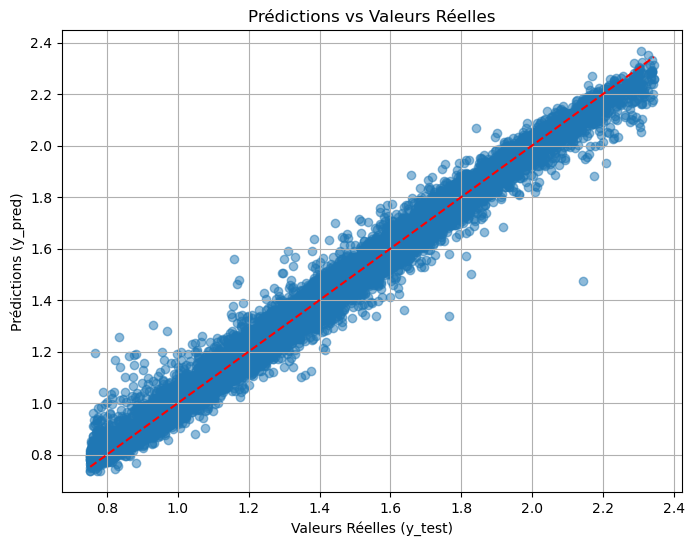

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # ligne parfaite
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Prédictions (y_pred)')
plt.title('Prédictions vs Valeurs Réelles')
plt.grid(True)
plt.show()

### 2. Distribution des Erreurs (résidus)

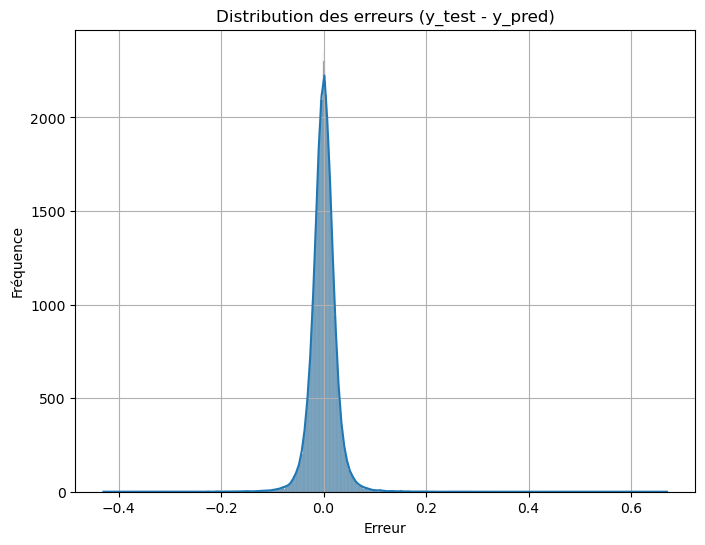

In [29]:
erreurs = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(erreurs, kde=True)
plt.title("Distribution des erreurs (y_test - y_pred)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


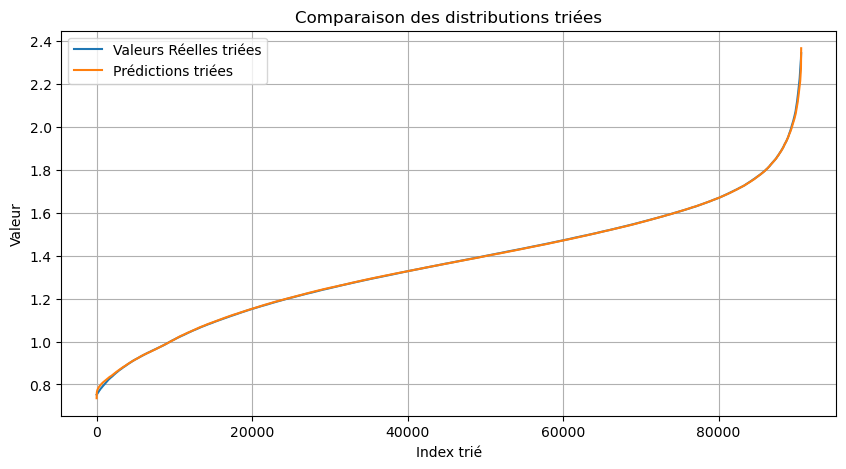

In [31]:
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(np.sort(y_test), label='Valeurs Réelles triées')
plt.plot(np.sort(y_pred), label='Prédictions triées')
plt.title("Comparaison des distributions triées")
plt.xlabel("Index trié")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.show()


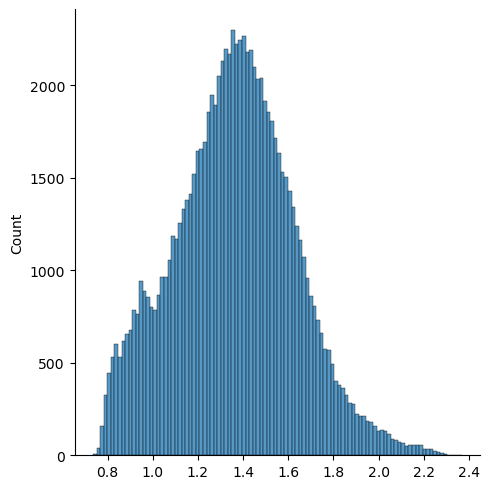

In [35]:
sns.displot(y_pred)

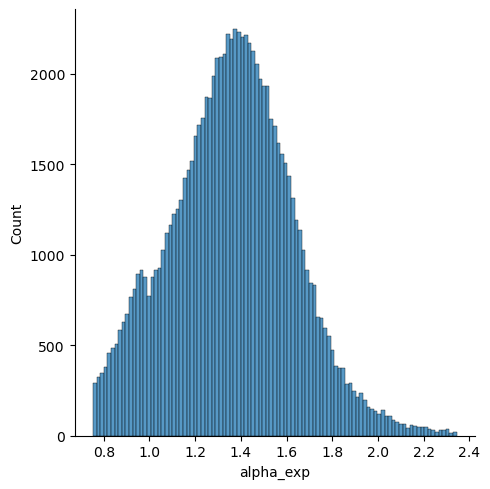

In [36]:
sns.displot(y_test)

### Real MAE :

In [37]:
y_pred_real=np.log(y_pred)
y_test_real=np.log(y_test)
MAE=mean_absolute_error(y_pred_real,y_test_real)
print(f'MAE: {MAE}')

MAE: 0.013132301968326085


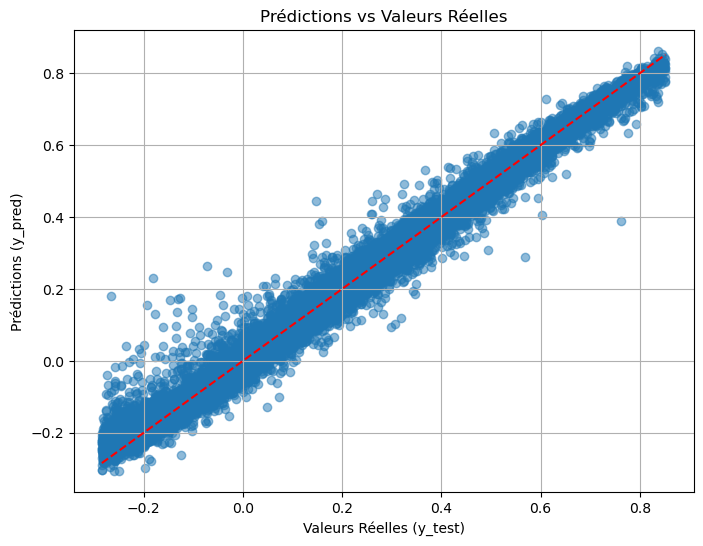

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.5)
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], 'r--')  # ligne parfaite
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Prédictions (y_pred)')
plt.title('Prédictions vs Valeurs Réelles')
plt.grid(True)
plt.show()